<a href="https://colab.research.google.com/github/A-Marambe/Raster_tools/blob/master/Zonal_Stat_RasterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zonal statistics Raster Analysis**

Zonal stat extraction is an essential component of raster analysis to compose usable insights out of raster analysis. In ecology, or agriculture, efficient raster analysis procedures should be equipped with the bulk-batch processing capabilities to add more reasonable time components (generating time series).
 
This notebook iterates over the daily evapotranspiration dataset and extracts daily zonal statistics values based on Landcover type. Land Cover types are corn, soybean, alfalfa, wheat, grass, deciduous.
For the statistical data display, web compatible, modern data visualization techniques will be used.



Install folowing packages , which are not default in google colab or miniconda

*!pip install geopandas

*!pip install rasterio

*!pip install  rasterstats


In [0]:
# imports
import os
import glob

# array and data handling imports
import numpy as np
import pandas as pd
import geopandas as gpd

# raster operations imports
import rasterio as ras
from rasterio.plot import show
from rasterstats import zonal_stats
from osgeo import gdal,osr


%matplotlib inline

# ***Mounting Google drive for data I/o*** 
Note: this step is not an essential step. Run this step, If you are keen to work all cloud based data ingestion and analysis. Following snippet will pop up a message. Follow the message and authorize the access to your google drive.

* Crete folders in google drive (or local computer) for input data storage and out put csv files.
* Following snippet should be run one time and keep commented otherwise.

In [0]:
## uncoment and run this snippet to mount google drive if data I/O with Gdrive
#from google.colab import drive
#drive.mount('/content/gdrive')

In [0]:
""" 
This function open rasters in a given path and converts them to an array

parameters: image path
            band number should be change appropriately:: band number in rasterio stars from one, where 
            the band number in gdal call by index. for gdal band number one will be 0.
"""
def open_band(image_path):
    image_file = ras.open(image_path)
    # change band number if it is necessary
    image_data = image_file.read(1)
    return image_data


Some models outputs may not have CRS information associated with the image. Those images should be given a CRS before performing any analysis. Et images used for this analysis do not have CRS info. Here, a LAI (Leaf Area Index) image derived by Landsat 8 image used to extract the CRS

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 3900, 'height': 2700, 'count': 1, 'crs': CRS.from_epsg(32617), 'transform': Affine(10.0, 0.0, 231210.258,
       0.0, -10.0, 4638142.134), 'tiled': False, 'interleave': 'band'}


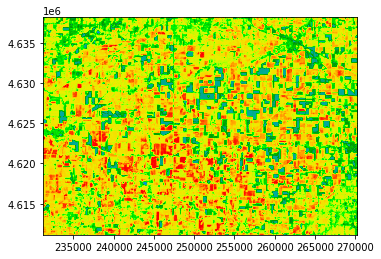

| 10.00, 0.00, 231210.26|
| 0.00,-10.00, 4638142.13|
| 0.00, 0.00, 1.00|


In [57]:
# open reference image
ref_image = ras.open("/content/gdrive/My Drive/colab_data/sentinel/LAI_aug.tif")
# see image profile
image_profile = ref_image.profile
# pull image meta data
print(image_profile)
show(ref_image, cmap="nipy_spectral")

# extract affine
affine_dt = image_profile['transform']
print(affine_dt)

**Important**

This data set named based on the julian day of the year. Therefore, simply open images based on the julian day

In [36]:
# change directory to input data folder
os.chdir("/content/gdrive/My Drive/colab_data/ET_images")

##  user input here
start_day = 214
end_day = 245


for i in range(start_day, end_day):
    # open images
    data = open_band("et"+str(i)+".img")
    print("image processing {val}".format(val=i-(start_day-1)))

    # saving georeferenced copy
    with ras.open("/content/gdrive/My Drive/colab_data/ET_out/et"+str(i)+".tif", 'w', **image_profile) as dst:
        dst.write(data, 1)
        print("copy saved")

print("**************************************************")
print("*********** Task completed successfully **********")
print("**************************************************")

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:218: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


image processing 1
image saved
image processing 2
image saved
image processing 3
image saved
image processing 4
image saved
image processing 5
image saved
image processing 6
image saved
image processing 7
image saved
image processing 8
image saved
image processing 9
image saved
image processing 10
image saved
image processing 11
image saved
image processing 12
image saved
image processing 13
image saved
image processing 14
image saved
image processing 15
image saved
image processing 16
image saved
image processing 17
image saved
image processing 18
image saved
image processing 19
image saved
image processing 20
image saved
image processing 21
image saved
image processing 22
image saved
image processing 23
image saved
image processing 24
image saved
image processing 25
image saved
image processing 26
image saved
image processing 27
image saved
image processing 28
image saved
image processing 29
image saved
image processing 30
image saved
image processing 31
image saved
*****************

In [0]:
# import zone shape files
zone_data = gpd.read_file("/content/gdrive/My Drive/colab_data/zone_polygons/zone.shp")
shape_1=zone_data[zone_data.poly=="area"]
shape_2=zone_data[zone_data.poly=="area2"]

In [76]:
# itterate over images to collect zonal stats

zonal_list = []
day_of_month = []
for i in range(start_day, end_day):

    day = i-(start_day-1)
    print(day)
    day_of_month.append(day)
    grefed_img = open_band("/content/gdrive/My Drive/colab_data/ET_out/et"+str(i)+".tif")
    zs_ohio = zonal_stats(shape_1, grefed_img, affine=affine_dt, stats=['min', 'max', 'mean', 'median', 'majority'])
    zonal_list.append(zs_ohio[0])
    



1


/usr/local/lib/python3.6/dist-packages/rasterstats/io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [77]:
df= pd.DataFrame(zonal_list)
df['day'] = day_of_month
df

,min,max,mean,median,majority,day
0,0.0,5.076313,3.625879,3.538583,0.000000,1
1,0.0,6.420616,4.701215,4.765704,4.714697,2
2,0.0,6.104323,4.421535,4.402244,0.000000,3
3,0.0,6.017591,4.458630,4.629833,0.000000,4
4,0.0,5.136528,3.624217,3.698435,4.968178,5
5,0.0,4.429398,3.254281,3.264404,0.000000,6
6,0.0,5.667180,4.022427,3.966707,5.259831,7
7,0.0,5.187387,3.685587,3.705535,3.056432,8
8,0.0,4.529415,3.255353,3.248413,0.000000,9
9,0.0,5.097950,3.620220,3.609963,0.000000,10


In [112]:
zone_data = gpd.read_file("/content/gdrive/My Drive/colab_data/zone_polygons/zone.shp")
shape_1=zone_data[zone_data.poly=="area"]
shape_2=zone_data[zone_data.poly=="area2"]

shape_list = [shape_1, shape_2]

zone_name = []
for shape in shape_list:
    print(shape)

   id  poly                                           geometry
0   1  area  POLYGON ((244169.137 4628698.863, 252779.990 4...
   id   poly                                           geometry
1   2  area2  POLYGON ((254113.509 4625185.212, 257874.705 4...


In [107]:
zone_data = gpd.read_file("/content/gdrive/My Drive/colab_data/zone_polygons/zone.shp")
shape_1=zone_data[zone_data.poly=="area"]
shape_2=zone_data[zone_data.poly=="area2"]

# itterate over images to collect zonal stats
shape_list = [shape_1, shape_2]

zonal_list = []
day_of_month = []
zone_name = []
for shape_j in shape_list:
    #zoneLC = shape_J
    #zone_name.append(zoneLC)
    #print(zoneLC)
    #print(shape_j)
    
    for i in range(start_day, end_day):

        day = i-(start_day-1)
        print(day)
        day_of_month.append(day)
        grefed_img = open_band("/content/gdrive/My Drive/colab_data/ET_out/et"+str(i)+".tif")
        
        zs_ohio = zonal_stats(shape_j, grefed_img, affine=affine_dt, stats=['min', 'max', 'mean', 'median', 'majority'])
        zonal_list.append(zs_ohio[0])

1


/usr/local/lib/python3.6/dist-packages/rasterstats/io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [109]:
df= pd.DataFrame(zonal_list)
df['day'] = day_of_month
df.head(60)

,min,max,mean,median,majority,day
0,0.0,5.076313,3.625879,3.538583,0.000000,1
1,0.0,6.420616,4.701215,4.765704,4.714697,2
2,0.0,6.104323,4.421535,4.402244,0.000000,3
3,0.0,6.017591,4.458630,4.629833,0.000000,4
4,0.0,5.136528,3.624217,3.698435,4.968178,5
5,0.0,4.429398,3.254281,3.264404,0.000000,6
6,0.0,5.667180,4.022427,3.966707,5.259831,7
7,0.0,5.187387,3.685587,3.705535,3.056432,8
8,0.0,4.529415,3.255353,3.248413,0.000000,9
9,0.0,5.097950,3.620220,3.609963,0.000000,10


In [64]:
data2 = open_band("/content/gdrive/My Drive/colab_data/ET_out/et215.tif")
#show(data2, cmap="nipy_spectral")

zone_data = gpd.read_file("/content/gdrive/My Drive/colab_data/zone_polygons/zone.shp")



shape_1=zone_data[zone_data.poly=="area"]
shape_2=zone_data[zone_data.poly=="area2"]


zs_ohio = zonal_stats(shape_1, data2, affine=affine_dt, stats=['min', 'max', 'mean', 'median', 'majority'])
zs_ohio

/usr/local/lib/python3.6/dist-packages/rasterstats/io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


[{'majority': 4.714697360992432,
  'max': 6.4206156730651855,
  'mean': 4.701214513996761,
  'median': 4.765704154968262,
  'min': 0.0}]